In [37]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import math
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import seaborn as sns
# Apply the default theme
sns.set_theme()
# read the data
df = pd.read_csv('tips.csv', delimiter=',')

## Exploring data

In [38]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


<AxesSubplot:>

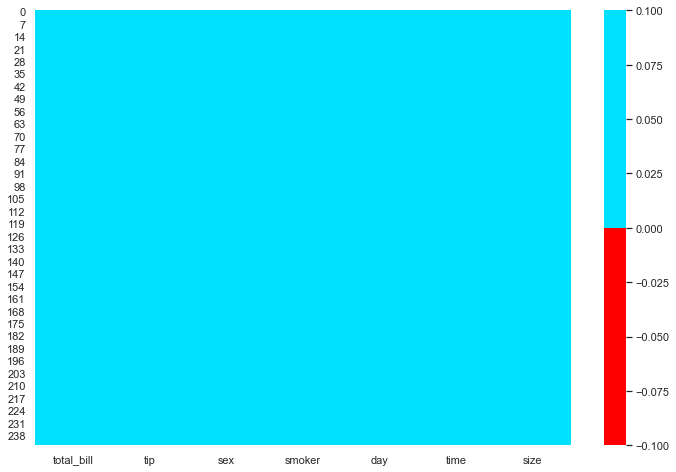

In [41]:
# Another method to looking for missing values
colours=("#FF0000","#00e1ff")
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

In this case there is no variation of color because there ara not mission values.

In [42]:
# Another method to looking for missing values
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [43]:
# If it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

total_bill - 0%
tip - 0%
sex - 0%
smoker - 0%
day - 0%
time - 0%
size - 0%


There are not missing values

In [44]:
# Shape and data types of the data
print(df.shape)
print(df.dtypes)

# Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# Select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(244, 7)
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object
['total_bill' 'tip' 'size']
['sex' 'smoker' 'day' 'time']


In [45]:
# Looking for duplicates
df.duplicated().sum()

1

In [46]:
# Drop duplicate
df_dedupped = df.drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

(244, 7)
(243, 7)


There was a duplicated value that has been droped

In [47]:
# New palette 
sns.color_palette("hls",8)


[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [48]:
# Stablish new palette 
sns.set_theme(palette="hls")

### Categorical variables exploration


We assume all clients are paying tips, as is common in USA, for example, so data also reflects partially the clients features.

In [49]:
a= df[['sex']].value_counts(normalize=True)
print (a)


sex   
Male      0.643443
Female    0.356557
dtype: float64


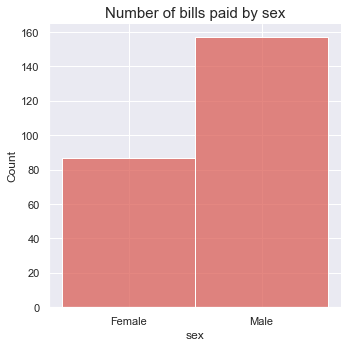

In [50]:
sns.displot(data=df, x='sex')
plt.title("Number of bills paid by sex", loc='center',fontsize = 15)
plt.tight_layout()
plt.show()

The clients paying the bills and tips are mostly male in 64% of the cases. We don't know the number of paxs per table and the composition of the dinner guests. It could be that there are more male guests o for cultural reasons men tend to pay more often the bills.

In [51]:
df[['smoker']].value_counts(normalize=True)


smoker
No        0.618852
Yes       0.381148
dtype: float64

62% of clients paying the bill are not smokers

In [52]:
df[['sex','smoker']].value_counts(normalize=True)

sex     smoker
Male    No        0.397541
        Yes       0.245902
Female  No        0.221311
        Yes       0.135246
dtype: float64

The most comon client paying the bill is a no smoker male, with 40% of the sample cases.

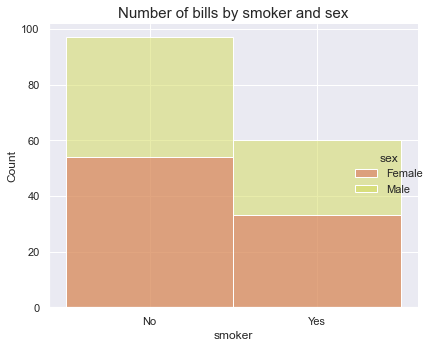

In [53]:
sns.displot(data=df, x='smoker', hue='sex')
plt.title("Number of bills by smoker and sex", loc='center',fontsize = 15)
plt.tight_layout()
plt.show()

The number of smokers and no smokers by sex are similar.

In [54]:
df[['day']].value_counts(normalize=True)


day 
Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
dtype: float64

The day of the week with more accounts is Saturday, with 36% of the total, followed by Sunday, with 31% of the total.

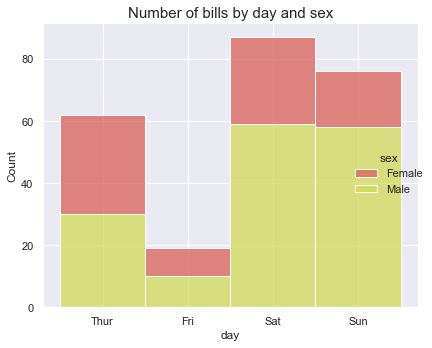

In [55]:
df['day'] = pd.Categorical(df['day'],categories=["Thur", "Fri","Sat","Sun"], ordered= True) # Order categories in day
sns.displot(data=df, x='day', hue='sex', multiple="stack", legend=True)
plt.title("Number of bills by day and sex", loc='center',fontsize = 15)
plt.tight_layout()
plt.show()

On Saturday and Sunday, male pay the bill more often than women. On Thurdays and Fridays, half in half. 

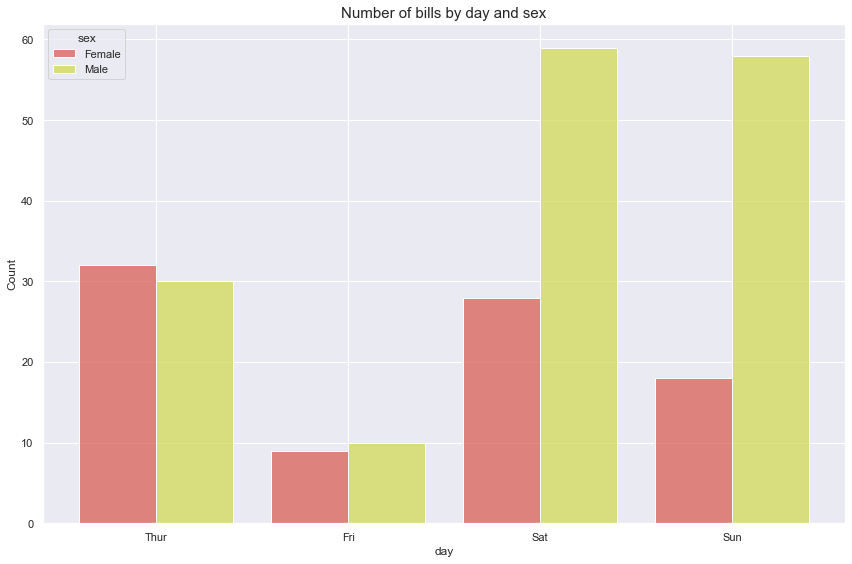

In [56]:
sns.histplot(data=df, x="day", hue="sex", multiple="dodge", shrink=.8)
plt.title("Number of bills by day and sex", loc='center',fontsize = 15)
plt.tight_layout()
plt.show()

Alternative plot.

In [57]:
df[['time']].value_counts(normalize=True)

time  
Dinner    0.721311
Lunch     0.278689
dtype: float64

The cllients come mostly for dinner(72% of cases)

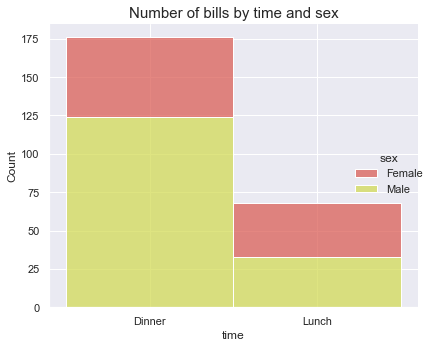

In [58]:
sns.displot(data=df, x='time', hue='sex', multiple="stack", legend=True)
plt.title("Number of bills by time and sex", loc='center',fontsize = 15)
plt.tight_layout()
plt.show()

Male tend to pay more often dinners. Lunch the distribution is half and half.

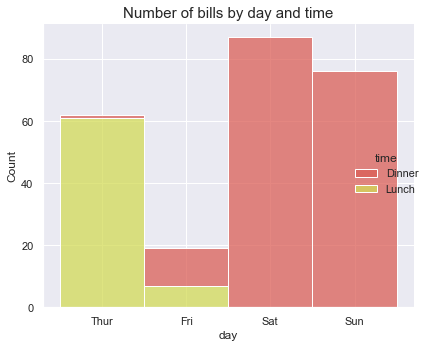

In [59]:
sns.displot(data=df, x='day', hue='time', multiple="stack", legend=True)
plt.title("Number of bills by day and time", loc='center',fontsize = 15)
plt.tight_layout()
plt.show()

On Thursdays most of the bills are for lunch. On Saturdays and Sundays the restaurant only opens for dinner.

In [60]:
df[['size']].value_counts(normalize=True)

size
2       0.639344
3       0.155738
4       0.151639
5       0.020492
1       0.016393
6       0.016393
dtype: float64

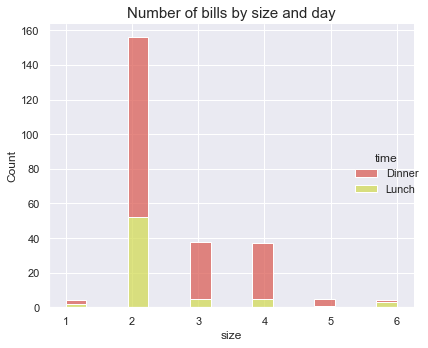

In [61]:
sns.displot(data=df, x='size', hue='time', multiple="stack", legend=True)
plt.title("Number of bills by size and day", loc='center',fontsize = 15)
plt.tight_layout()
plt.show()

The most common size is a table? of 2 people, with 64% of tables, followed by 3 people (16%).

### Numerical variables exploration

In [62]:
df.groupby(['smoker'])[['total_bill']].describe(percentiles=[0.25, 0.5, 0.75, 0.95])

total_bill                                                            \
            count       mean       std   min     25%    50%     75%     95%   
smoker                                                                        
No          151.0  19.188278  8.255582  7.25  13.325  17.59  22.755  35.045   
Yes          93.0  20.756344  9.832154  3.07  13.420  17.92  26.860  40.322   

               
          max  
smoker         
No      48.33  
Yes     50.81

In [63]:
df.groupby(['sex'])[['total_bill']].describe(percentiles=[0.25, 0.5, 0.75, 0.95])

total_bill                                                          \
            count       mean       std   min    25%    50%    75%     95%   
sex                                                                         
Female       87.0  18.056897  8.009209  3.07  12.75  16.40  21.52  34.824   
Male        157.0  20.744076  9.246469  7.25  14.00  18.35  24.71  39.570   

               
          max  
sex            
Female  44.30  
Male    50.81

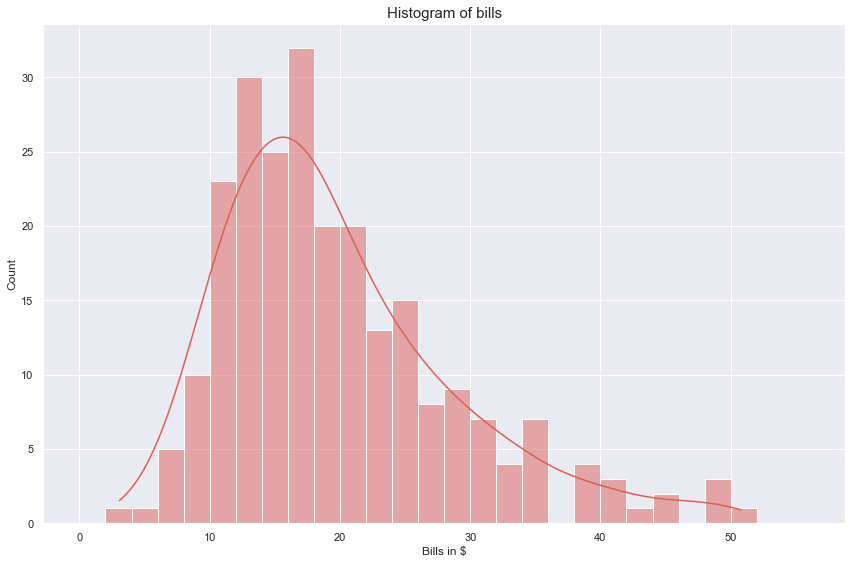

In [64]:
sns.histplot(data=df, x="total_bill", kde=True, binwidth=2, binrange=(0, 55))
plt.title("Histogram of bills", loc='center',fontsize = 15)
plt.xlabel('Bills in $')
plt.tight_layout()
plt.show()

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins. I have added a continuous probability density curve, a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution. Total bills have a non-symetrical distribution that is positively skewed because the median closer to the lower or bottom quartile, so the mean is bigger than the median and the "tail" of the distribution points to the righ.The kurtosis is negative because has lighter tails than the normal distribution. The most common bill is about 18$.

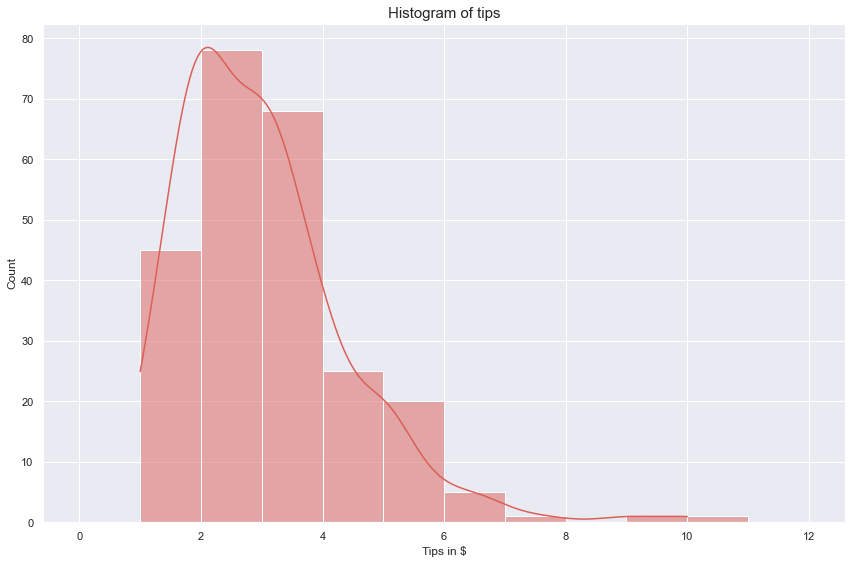

In [65]:

sns.histplot(data=df, x="tip", kde=True, binwidth=1, binrange=(0, 12))
plt.title("Histogram of tips", loc='center',fontsize = 15)
plt.xlabel('Tips in $')
plt.tight_layout()
plt.show()


Tips have a non-symetrical distribution that is positively skewed because the median closer to the lower or bottom quartile, so the mean is bigger than the median and the "tail" of the distribution points to the righ.The kurtosis is negative because has lighter tails than the normal distribution. The most common tip is about 3$.

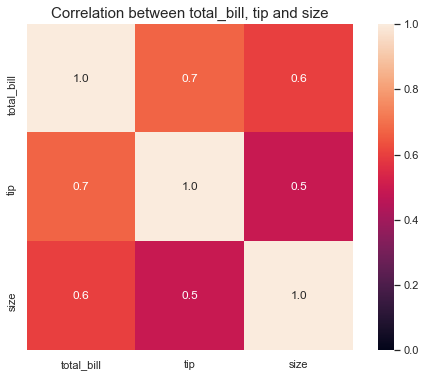

In [66]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, vmax=1, vmin=0, annot=True, square=True,fmt='.1f');
plt.title('Correlation between total_bill, tip and size',fontsize=15)
plt.show()

There is a positive modetare correlation betwen total_bill and tip and between size and totat_bill. The correlation between tip and size is weak or low positive correlation.

Text(0.5, 1.0, 'Relationship between total_bill and size')

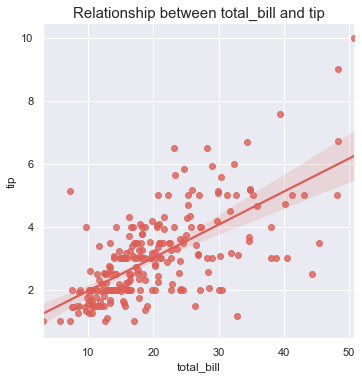

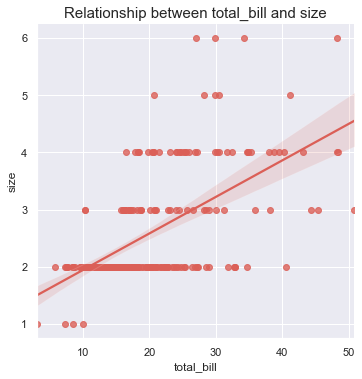

In [67]:
sns.lmplot(data=df, x="total_bill", y="tip")
plt.title('Relationship between total_bill and tip',fontsize=15)
sns.lmplot(data=df, x="total_bill", y="size")
plt.title('Relationship between total_bill and size',fontsize=15)


The regression line helps us to identifie the linear relationship between the two variables. Confirms that there is a positive correlation.

Text(0.5, 1.0, 'Relationship between total_bill and tip')

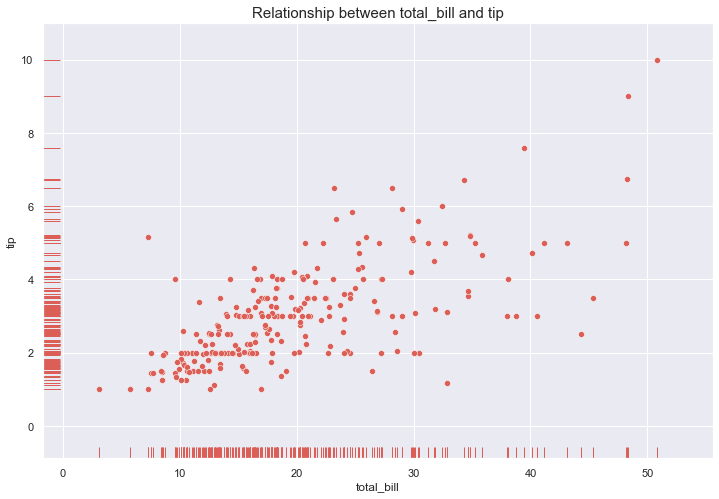

In [68]:
sns.scatterplot(data=df, x="total_bill", y="tip")
sns.rugplot(data=df, x="total_bill", y="tip")
plt.title('Relationship between total_bill and tip',fontsize=15)

Another visualisation that mixes scatterplot and rugplot, which plots marginal distributions by drawing ticks along the x and y axes.This function is intended to complement other plots by showing the location of individual observations in an unobstrusive way. We can see clearly were are the most common bills and tips and were outlier lye.

Text(0.5, 0.98, 'Relationship between total_bill and tip')

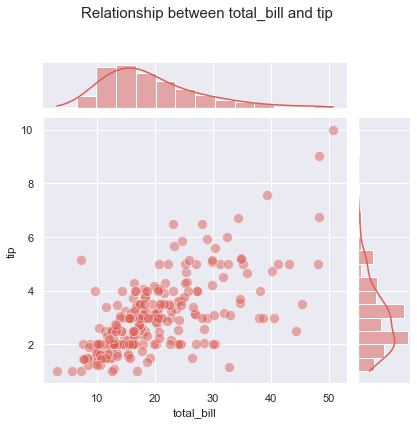

In [69]:
b = sns.JointGrid(data=df, x="total_bill", y="tip")
b.plot_joint(sns.scatterplot, s=100, alpha=.5)
b.plot_marginals(sns.histplot, kde=True)
b.fig.subplots_adjust(top=0.85)
b.fig.suptitle('Relationship between total_bill and tip',fontsize=15)


This plotting method accepts a pair of functions (one for the joint axes and one for both marginal axes).

Text(0.5, 1.0, 'Relationship between total_bill and tip')

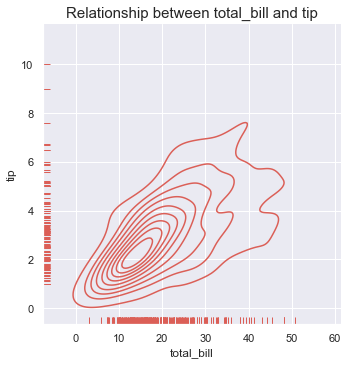

In [70]:
sns.displot(data=df, x="total_bill", y="tip", kind="kde", rug=True)
plt.title('Relationship between total_bill and tip',fontsize=15)

The Gaussian 2d shows were the correlation in stronger, a bill between 10 and 18 dollars and a tip between 1,5 and 2,5 dollars aprox.

Text(0.5, 1.0, 'Relationship between total_bill and tip by smoker')

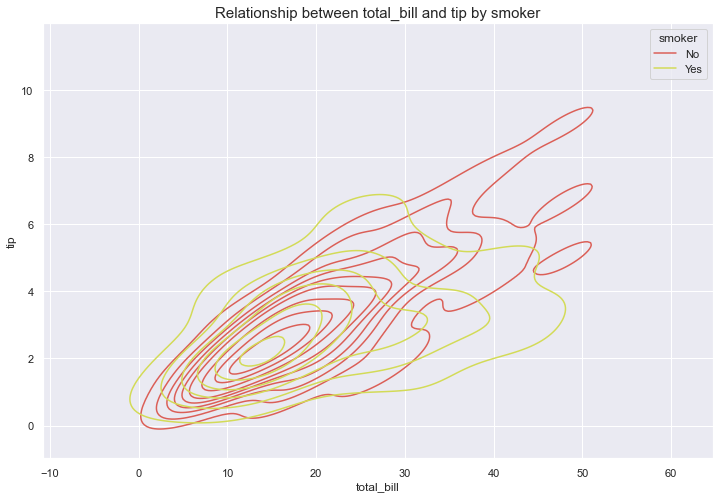

In [71]:
sns.kdeplot(data=df, x="total_bill", y="tip", hue="smoker")
plt.title('Relationship between total_bill and tip by smoker',fontsize=15)

If we add a hue for smoker, we can observe that non smokers are more "generous" with tips when the bill is greater than 30$.

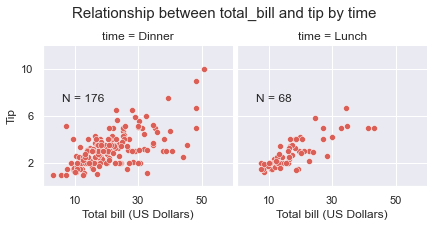

In [73]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)

c= sns.FacetGrid(df, col="time")
c.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
c.map_dataframe(annotate)
c.fig.subplots_adjust(top=0.80)
c.fig.suptitle('Relationship between total_bill and tip by time',fontsize=15)
c= (c.set_axis_labels("Total bill (US Dollars)", "Tip")
      .set(xlim=(0, 60), ylim=(0, 12),
           xticks=[10, 30, 50], yticks=[2, 6, 10])
      .fig.subplots_adjust(wspace=.02))


We can also annotate the number of points or observations and rename x and y axis. Dinners more than double lunches.

Text(0.5, 0.98, 'Relationship between total_bill and tip by time and smoker')

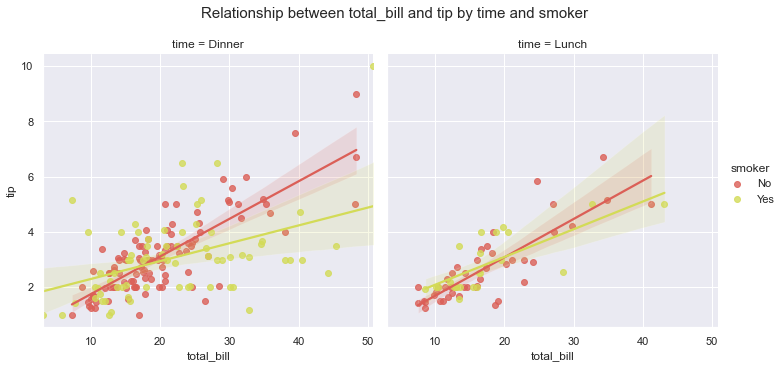

In [74]:
d=sns.lmplot(x="total_bill", y="tip", hue="smoker", col='time', data=df)
d.fig.subplots_adjust(top=0.85)
d.fig.suptitle('Relationship between total_bill and tip by time and smoker',fontsize=15)


Non smokers have a tendency to give more tips when the bill is bigger than 18$, specially for dinner. Perhaps this is due that lunches are in business days and dinners are more oriented to celebration and enjoyment. It seems smokers a less satisfied than non smokers and pay less tips. It could be that they don't have a smokers place.

Text(0.5, 0.98, 'Relationship between total_bill and tip by sex and smoker')

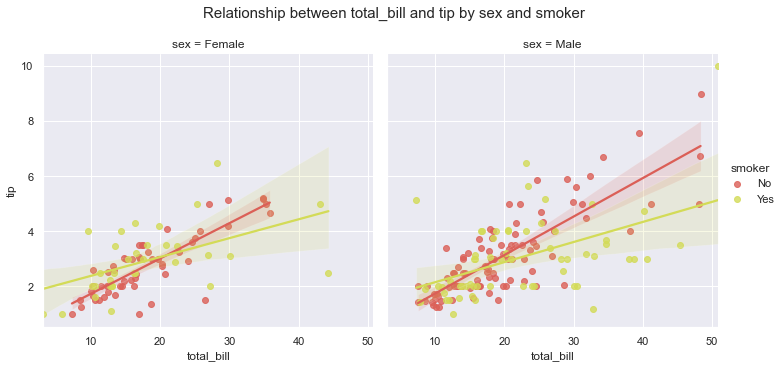

In [75]:
f=sns.lmplot(x="total_bill", y="tip", hue="smoker", col='sex', data=df)
f.fig.subplots_adjust(top=0.85)
f.fig.suptitle('Relationship between total_bill and tip by sex and smoker',fontsize=15)


Male and female smokers tend equally to pay less tips. I could confirm the insatisfaction previously commented. 

Text(0.5, 0.98, 'Relationship between total_bill and tip by day and smoker')

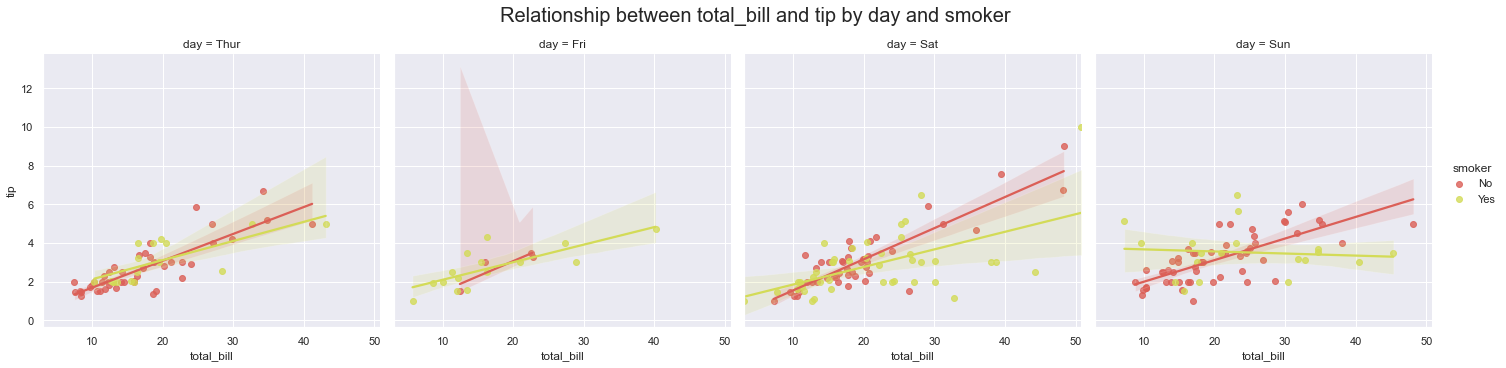

In [76]:
g=sns.lmplot(x="total_bill", y="tip", hue="smoker", col='day', data=df)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Relationship between total_bill and tip by day and smoker',fontsize=20)


On Thursdays, Saturdays and Sundays, the tendency is the same for non smokers. Though, on Sundays smoker pay far less tips when the bill is bigger than 23$. 

Text(0.5, 1.0, 'Relationship between tip and day, with confidence intervals')

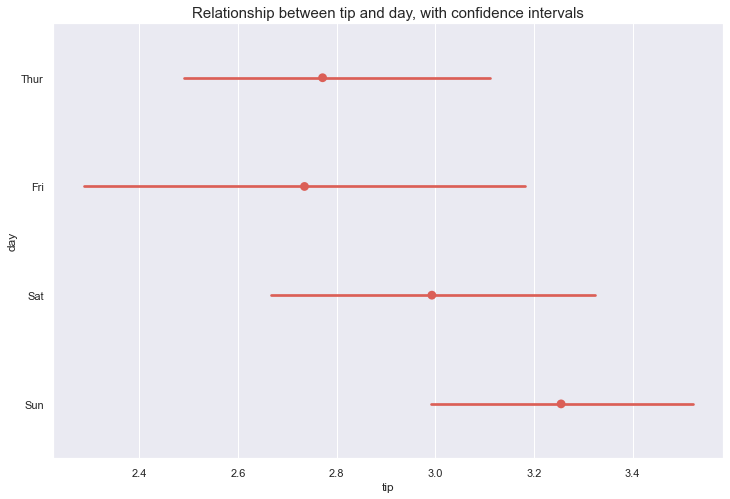

In [77]:
sns.pointplot(x="tip", y="day", data=df, join=False)
plt.title('Relationship between tip and day, with confidence intervals',fontsize=15)

Show point estimates and confidence intervals using scatter plot glyphs. A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars. On Fridays the estimate error is wider because there are few entry point. Tips are higher on Sundays.

Text(0.5, 0.98, 'Relationship between tip, sex, time and smoker, by confidence interval')

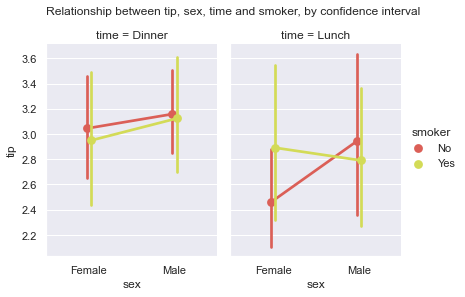

In [78]:
h = sns.catplot(x="sex", y="tip",hue="smoker", col="time", data=df, kind="point",dodge=True, height=4, aspect=.7)
h.fig.subplots_adjust(top=0.85)
h.fig.suptitle('Relationship between tip, sex, time and smoker, by confidence interval',fontsize=12)


Tips paid by dinner tend to be higher both by female and male, smoker or not smoker. The confidence is lower for smoker females because there is less frequency, so more uncertainty.

Text(0.5, 1.0, 'Density of total_bill by size of tip')

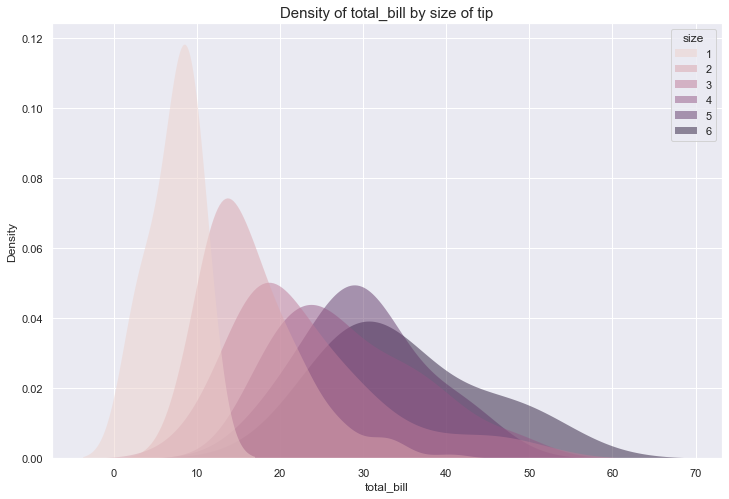

In [79]:
sns.kdeplot(data=df, x="total_bill", hue="size",fill=True, common_norm=False,alpha=.5, linewidth=0,)
plt.title('Density of total_bill by size of tip',fontsize=15)

Another graphic to show the relationship between variables. In this case, the size and total_bill. We can observe the correlation between the bills in dollars and size of tips and its frequency.

Text(0.5, 1.0, 'Density of total_bill by time')

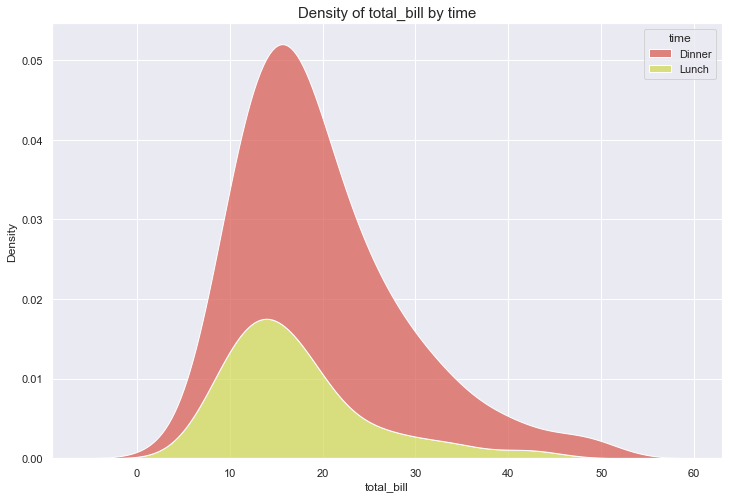

In [80]:
sns.kdeplot(data=df, x="total_bill", hue="time", multiple="stack")
plt.title('Density of total_bill by time',fontsize=15)

Another graphic to show the relationship between variables. In this case, the density of bills for dinner and lunch. Dinner is far more frequent than lunch. 

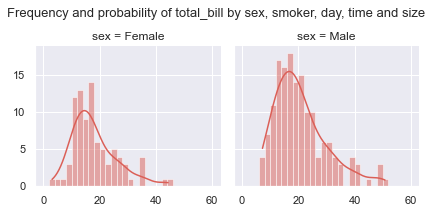

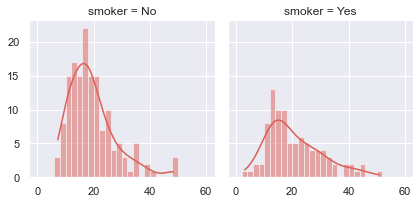

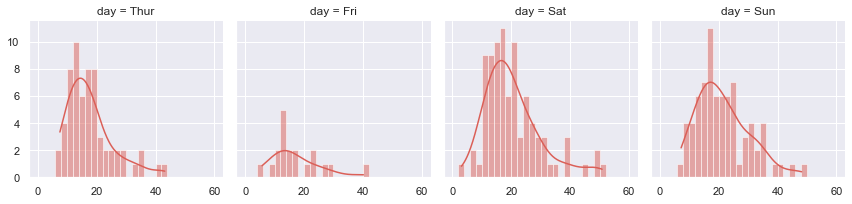

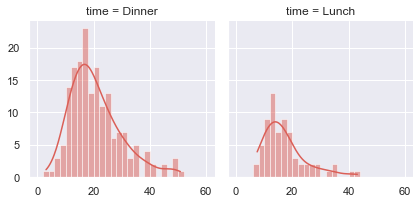

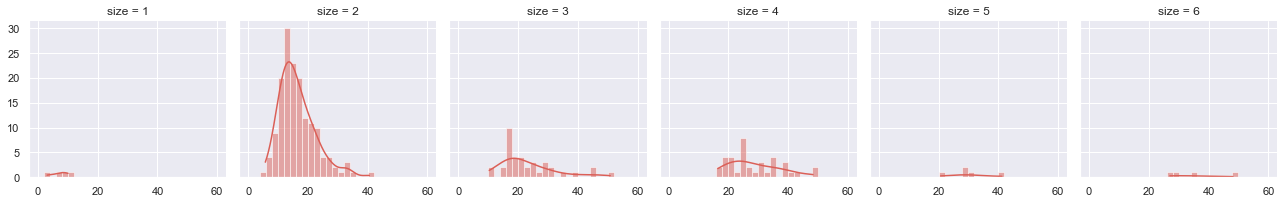

In [81]:
i = sns.FacetGrid(df, col="sex")
i.map_dataframe(sns.histplot, x="total_bill", binwidth=2, binrange=(0, 60),kde=True)
i.fig.subplots_adjust(top=0.80)
i.fig.suptitle('Frequency and probability of total_bill by sex, smoker, day, time and size',fontsize=13)
j = sns.FacetGrid(df, col="smoker")
j.map_dataframe(sns.histplot, x="total_bill", binwidth=2, binrange=(0, 60),kde=True)
k = sns.FacetGrid(df, col="day")
k.map_dataframe(sns.histplot, x="total_bill", binwidth=2, binrange=(0, 60),kde=True)
l = sns.FacetGrid(df, col="time")
l.map_dataframe(sns.histplot, x="total_bill", binwidth=2, binrange=(0, 60),kde=True)
m = sns.FacetGrid(df, col="size")
m.map_dataframe(sns.histplot, x="total_bill", binwidth=2, binrange=(0, 60),kde=True)


Another representations of frequency and probability of all the variables in relation to total_bill.

In [82]:
df.groupby(['sex','day'])[['tip']].describe(percentiles=[0.25, 0.5, 0.75, 0.95])

tip                                                           \
            count      mean       std   min     25%    50%     75%     95%   
sex    day                                                                   
Female Thur  32.0  2.575625  1.109286  1.25  1.8225  2.005  3.0575  5.0000   
       Fri    9.0  2.781111  0.938862  1.00  2.5000  3.000  3.2500  3.9720   
       Sat   28.0  2.801786  1.234480  1.00  2.1500  2.625  3.1025  4.8845   
       Sun   18.0  3.367222  1.136775  1.01  2.7075  3.500  3.9375  5.1490   
Male   Thur  30.0  2.980333  1.353734  1.44  2.0000  2.530  4.0000  5.4675   
       Fri   10.0  2.693000  1.136428  1.50  1.6650  2.600  3.3750  4.4015   
       Sat   59.0  3.083898  1.791360  1.00  2.0000  3.000  3.4000  6.8150   
       Sun   58.0  3.220345  1.271172  1.32  2.0000  3.085  3.9800  5.6075   

                    
               max  
sex    day          
Female Thur   5.17  
       Fri    4.30  
       Sat    6.50  
       Sun    5.20  
Male   Thur   6.70  
       Fri    4.73  
       Sat   10.00  
       Sun    6.50

This is a summary of statistics that will help me to comment on the next plots.

Text(0.5, 0.98, 'Distribution of tips by day, sex and smoker')

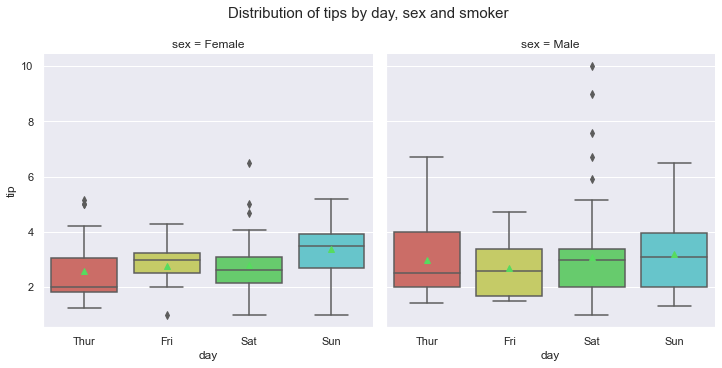

In [83]:
n=sns.catplot(data=df, kind="box", x="day", y="tip", col="sex",   showmeans=True)
n.fig.subplots_adjust(top=0.85)
n.fig.suptitle('Distribution of tips by day, sex and smoker',fontsize=15)


A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. Boxplots show five summary statistics, including median, derived from data to show distribution of numerical data corresponding categorical variables. I have also included the mean. The outliers are more or less than 1.5 times the upper or lower quartiles. Female clients pay higher tips on Sundays,  a median of 3.5 dollars and the lowest, on Thursdays, 2.0 dollars. Males, 2.5 dollars and 3.1 dollars for the same days. On Saturdays there are more outliers, especially by male, which pay tips over the average.

In [84]:
df.groupby(['smoker','day'])[['tip']].describe(percentiles=[0.25, 0.5, 0.75, 0.95])

tip                                                          \
            count      mean       std   min    25%    50%     75%     95%   
smoker day                                                                  
No     Thur  45.0  2.673778  1.282964  1.25  1.800  2.180  3.0000  5.1360   
       Fri    4.0  2.812500  0.898494  1.50  2.625  3.125  3.3125  3.4625   
       Sat   45.0  3.102889  1.642088  1.00  2.010  2.750  3.3900  6.5680   
       Sun   57.0  3.167895  1.224785  1.01  2.000  3.020  3.9200  5.1520   
Yes    Thur  17.0  3.030000  1.113491  2.00  2.000  2.560  4.0000  5.0000   
       Fri   15.0  2.714000  1.077668  1.00  1.960  2.500  3.2400  4.4290   
       Sat   42.0  2.875476  1.630580  1.00  2.000  2.690  3.1975  5.1520   
       Sun   19.0  3.516842  1.261151  1.50  3.000  3.500  4.0000  5.7350   

                    
               max  
smoker day          
No     Thur   6.70  
       Fri    3.50  
       Sat    9.00  
       Sun    6.00  
Yes    Thur   5.00  
       Fri    4.73  
       Sat   10.00  
       Sun    6.50

Text(0.5, 0.98, 'Distribution of tips by day and smoker')

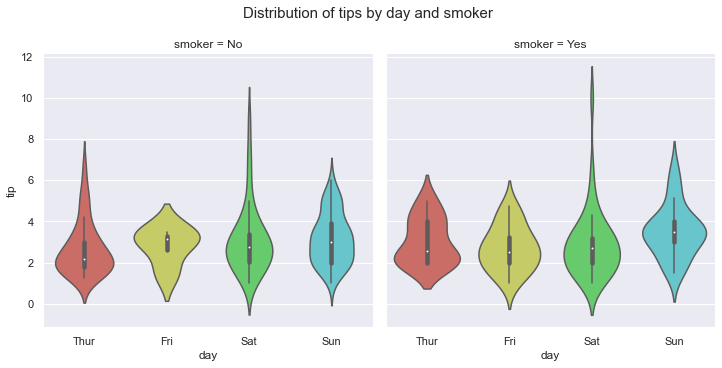

In [85]:
s=sns.catplot(data=df, kind="violin", x="day", y="tip", col="smoker",  showmeans=True)
s.fig.subplots_adjust(top=0.85)
s.fig.suptitle('Distribution of tips by day and smoker',fontsize=15)

With a violin plot we also add the frequency to the information provided by the box plot. Tips are specially higher on Sundays among smokers. On Saturday there are more outliers with tips higher than the average.

Text(0.5, 0.98, 'Distribution of tips by day, sex and smoker')

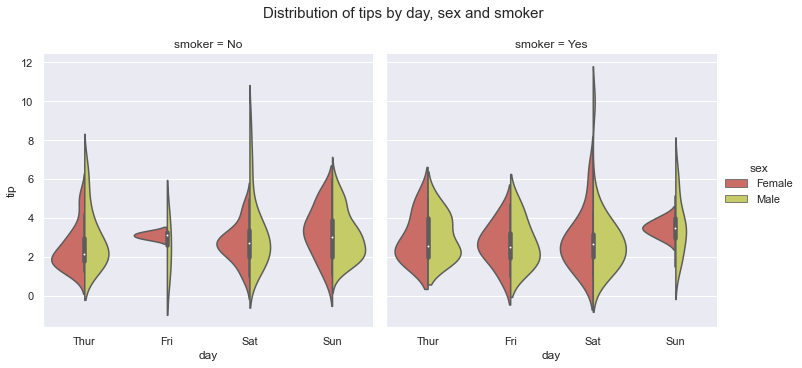

In [86]:
o=sns.catplot(data=df, kind="violin", x="day", y="tip", col="smoker", hue='sex',  split=True)
o.fig.subplots_adjust(top=0.85)
o.fig.suptitle('Distribution of tips by day, sex and smoker',fontsize=15)

In this plot I have added sex to see other differences of distribution. There are more male, 64% of total.

In [87]:
df.groupby(['time'])[['tip']].describe(percentiles=[0.25, 0.5, 0.75, 0.95])

tip                                                           
        count      mean       std   min  25%   50%     75%     95%   max
time                                                                    
Dinner  176.0  3.102670  1.436243  1.00  2.0  3.00  3.6875  5.6125  10.0
Lunch    68.0  2.728088  1.205345  1.25  2.0  2.25  3.2875  5.0000   6.7

Text(0.5, 0.98, 'Proportion of tips by time and smoker')

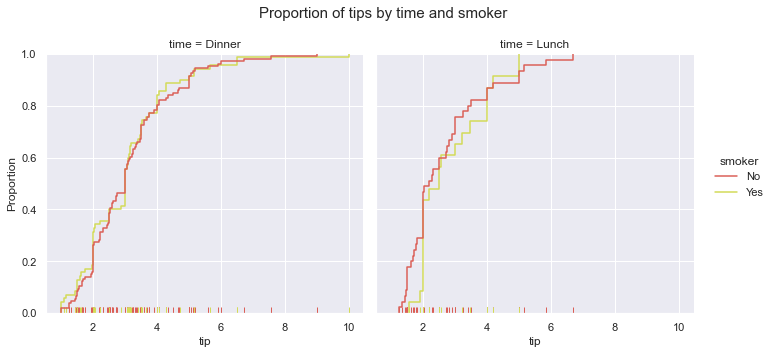

In [88]:
p=sns.displot(data=df, kind="ecdf", x="tip", col="time", hue="smoker", rug=True)
p.fig.subplots_adjust(top=0.85)
p.fig.suptitle('Proportion of tips by time and smoker',fontsize=15)

Half of the acumulated tips for dinner are aroud 3.0 dollars, the rest are between more than 3 dollars and 10 dollars. Half of the acumulated tips for lunch are 2.5 dollars, the rest are between more than 2.5 and 6.7 dollars.

Text(0.5, 1.0, 'Distribution of total_bill by day and smoker')

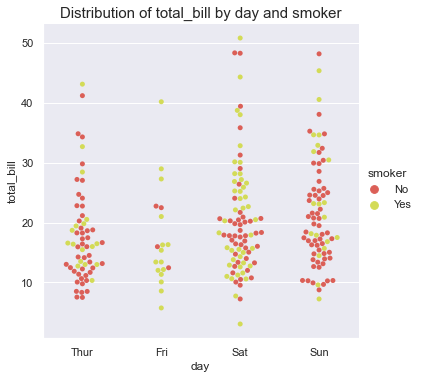

In [89]:
sns.catplot(data=df, kind="swarm", x="day", y="total_bill", hue="smoker")
plt.title('Distribution of total_bill by day and smoker',fontsize=15)

This plot gives us a better representation of the distribution of values and can complement box and violin plot in the same graphic. For exemple, in this graph we can observe that non smokers are majority in all days except on Fridays.

Text(0.5, 1.0, 'Relationship between total_bill and tip by day')

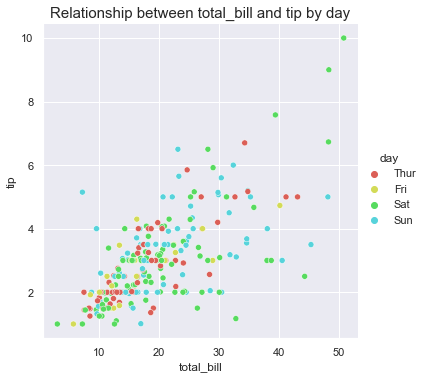

In [90]:
sns.relplot(data=df, x="total_bill", y="tip", hue="day")
plt.title('Relationship between total_bill and tip by day',fontsize=15)

This scatter plot help us to observe where outlier lye. For exemple, tips are paid above average on saturdays.

Text(0.5, 0.98, 'Relationship of total_bill and tip, by time and day')

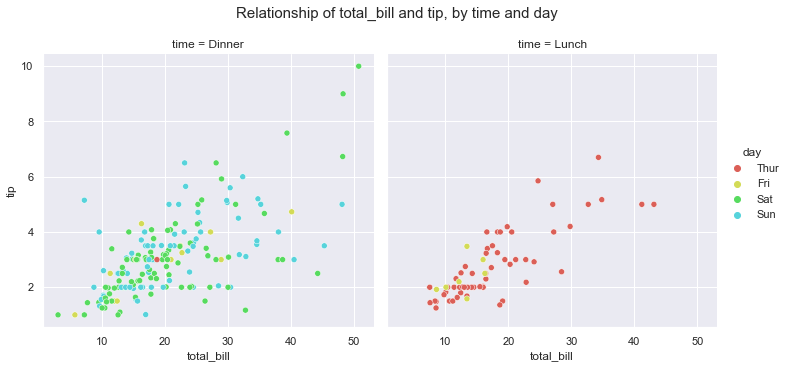

In [91]:
q=sns.relplot(data=df, x="total_bill", y="tip", hue="day", col="time")
q.fig.subplots_adjust(top=0.85)
q.fig.suptitle('Relationship of total_bill and tip, by time and day',fontsize=15)


When there are too many point, it can be difficult to reach to conclusions. If we introduce another category and divide the plot in two, it's easier to see the underlying patterns.

Text(0.5, 0.98, 'Relationship of total_bill and tip, by time, sex and day')

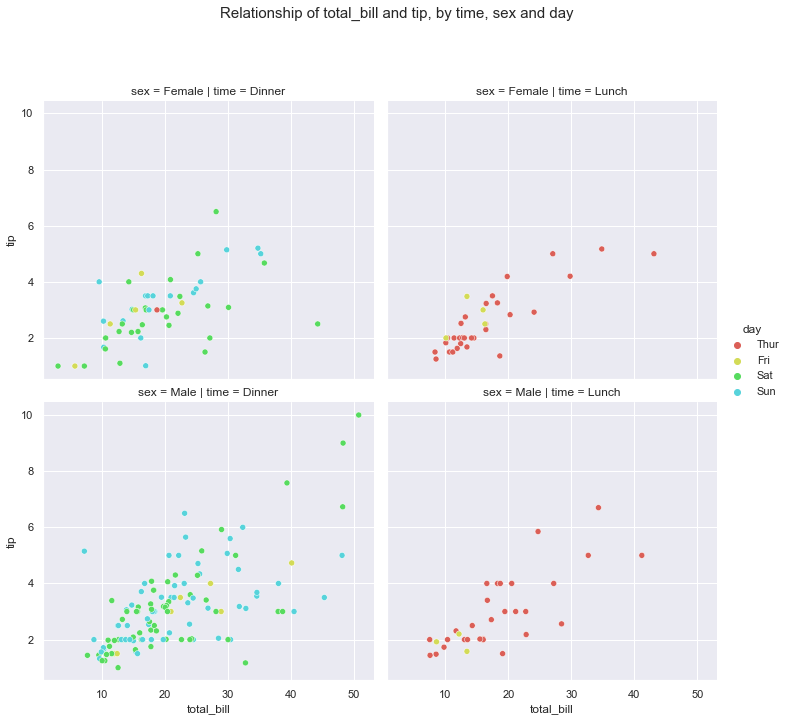

In [92]:
r=sns.relplot(data=df, x="total_bill", y="tip", hue="day", col="time", row="sex")
r.fig.subplots_adjust(top=0.85)
r.fig.suptitle('Relationship of total_bill and tip, by time, sex and day',fontsize=15)

Addign row 'sex' we can further the analisys. We can confirm that male are paying higher tips on average on Saturdays.

Text(0.5, 0.98, 'Relationship of total_bill and tip, by time, size and sex')

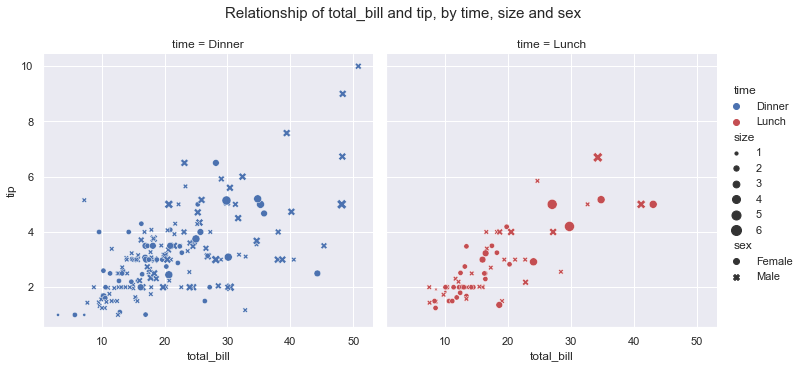

In [93]:
t=sns.relplot(data=df, x="total_bill", y="tip", col="time",hue="time", size="size", style="sex",palette=["b", "r"], sizes=(10, 100))
t.fig.subplots_adjust(top=0.85)
t.fig.suptitle('Relationship of total_bill and tip, by time, size and sex',fontsize=15)

We can add more layers in the same plot, but it can be more confusing when there are too many points.

Text(0.5, 1.0, 'Relationship between total_bill and size')

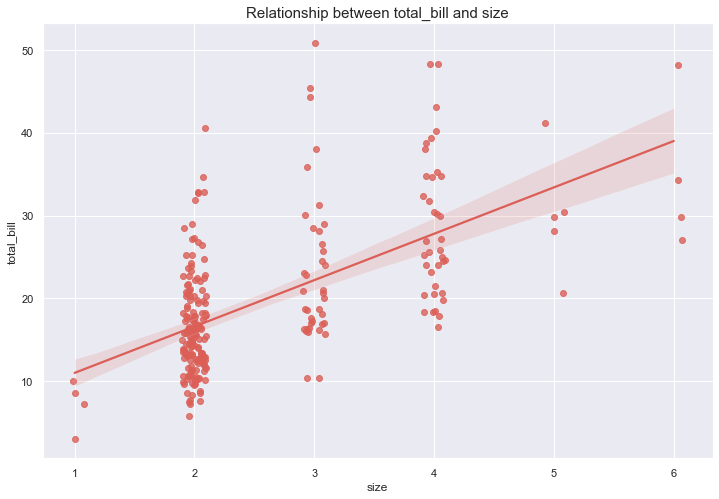

In [94]:
sns.regplot(x="size", y="total_bill", data=df, x_jitter=.1)
plt.title('Relationship between total_bill and size',fontsize=15)

There is correlation between size and total bill.

Text(0.5, 1.0, 'Relationship between total_bill and size, confidence intervals')

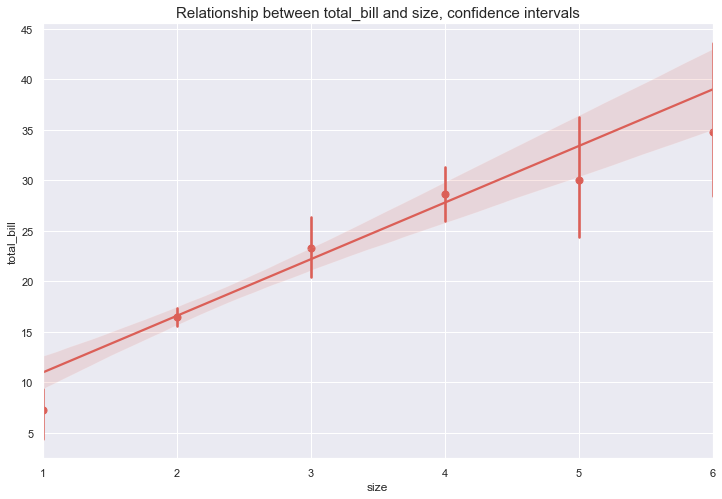

In [95]:
sns.regplot(x="size", y="total_bill", data=df, x_estimator=np.mean)
plt.title('Relationship between total_bill and size, confidence intervals',fontsize=15)

Show point estimates, confidence intervals using scatter plot glyphs and a regression line. A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars. 5 and 6 size the estimate error is wider because there are few entry point. It also shows that the proporion of total bill and size is less than in size 1-4.

Text(0.5, 0.98, 'Relationship of total_bill and size, by day')

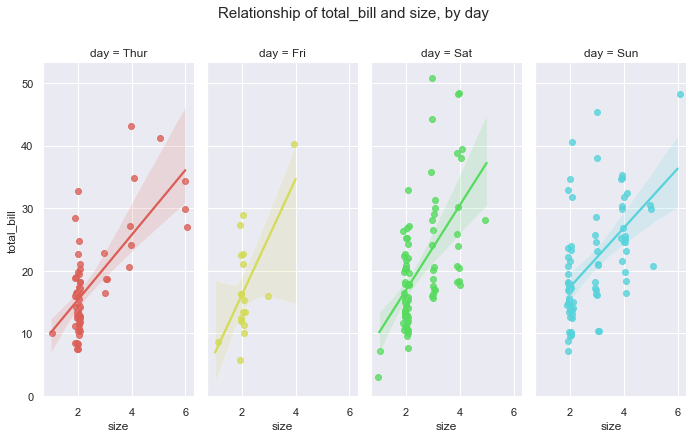

In [96]:
v= sns.lmplot(x="size", y="total_bill", hue="day", col="day",data=df, height=6, aspect=.4, x_jitter=.1)
v.fig.subplots_adjust(top=0.85)
v.fig.suptitle('Relationship of total_bill and size, by day',fontsize=15)

The size of tables correlates to the size of bills in all days. 

Text(0.5, 0.98, 'Relationship of total_bill and tip, by sex and size')

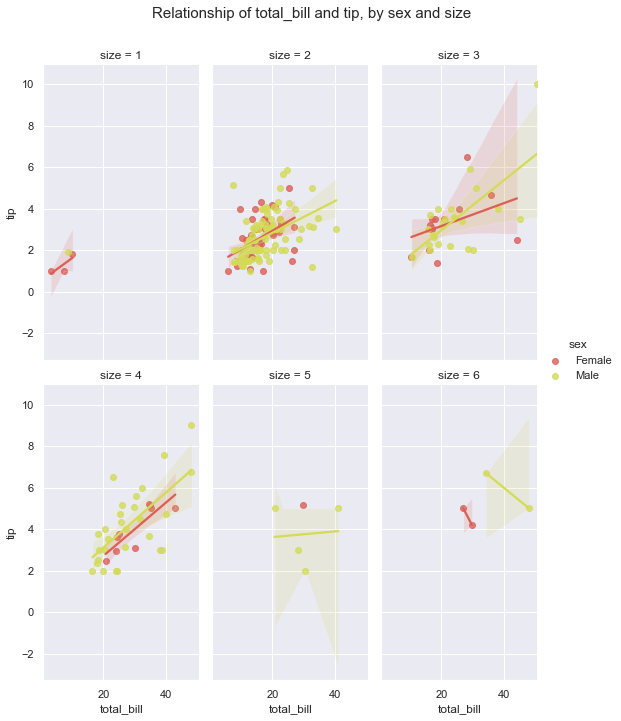

In [97]:
w= sns.lmplot(x="total_bill", y="tip", hue="sex", col="size",data=df, height=5, aspect=.5, x_jitter=.1, col_wrap=3)
w.fig.subplots_adjust(top=0.90)
w.fig.suptitle('Relationship of total_bill and tip, by sex and size',fontsize=15)

### Conclusion

We recommend improve the facilities to smokers to increment their satisfaction, revenue and tips. We also recommend to marketing special offers to women, who might be underrepresented among the restaurant's clients.